<a href="https://colab.research.google.com/github/vijaykumarharakuni/Deeplearning/blob/main/Copy_of_Pytorch_ANN_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import torch
import numpy as np
import torch.nn as nn # all Neural network
import torch.optim as optim # optimizer
import torch.nn.functional as F # activation function
from torchvision import datasets, transforms # dataset and transformation
from torch.utils.data.sampler import SubsetRandomSampler
print('All library imported')

All library imported


Process

1.Load(ETL)and Visulize the data
2.Pre Process the data
3.Define the model
4.Train the model
5.Save the Model
6.Evaluate & test the model

In [ ]:
# how the transformation will be applied
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# Load the data -train and test set
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True,transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False,transform=transform)
print('Data loaded')

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 269kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.96MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 5.79MB/s]

Data loaded


In [ ]:
print(trainset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /root/.pytorch/F_MNIST_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
print(testset)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /root/.pytorch/F_MNIST_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
indices=list(range(len(trainset)))
np.random.shuffle(indices)
#  20% of train set-validation data
split=int(np.floor(0.2*len(trainset)))
train_sample=SubsetRandomSampler(indices[split:])
valid_sample=SubsetRandomSampler(indices[:split])

In [ ]:
print(len(train_sample))
print(len(valid_sample))

48000
12000


In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,sampler=train_sample)
validloader=torch.utils.data.DataLoader(trainset,batch_size=64,sampler=valid_sample)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

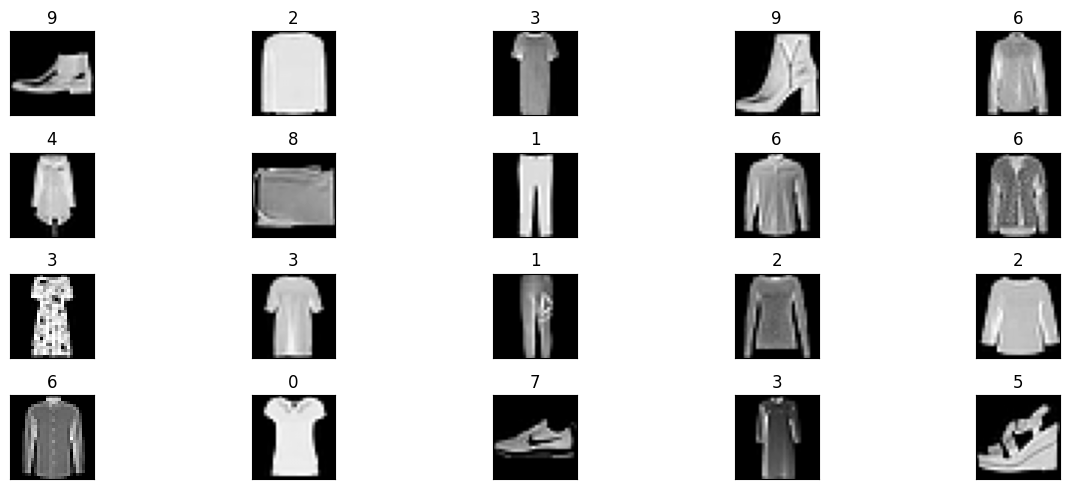

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# get some random training images
dataiter = iter(trainloader)
print(dataiter)
#images, labels = dataiter.next()
images, labels = next(dataiter)
#images, labels = trainloader
fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
  # xticks=[], yticks=[] is empty to print the images without any ticks around them
  #np.sqeeze : Remove single-dimensional entries from the shape of an array.
  ax = fig.add_subplot(4,5, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
   # .item() gets the value contained in a Tensor
  ax.set_title(labels[idx].item())
  fig.tight_layout()

In [ ]:
trainset.classes


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,256)
    self.fc2=nn.Linear(256,120)
    self.fc3=nn.Linear(120,10)
    self.dropout=nn.Dropout(p=0.2)
  def forward(self,x):
    x=x.view(x.shape[0],-1)
    x=self.dropout(F.relu(self.fc1(x)))
    x=self.dropout(F.relu(self.fc2(x)))
    #output layer
    x=F.log_softmax(self.fc3(x),dim=1)
    return x

In [ ]:
model=NeuralNetwork()
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
#visualize the neural network
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 773.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
from torchviz import make_dot
sample_input = torch.randn(1, 1, 28, 28)  # A single image (28x28)
output = model(sample_input)
# Visualizing the computation graph
make_dot(output, params=dict(model.named_parameters())).render("model_architecture", format="png")

'model_architecture.png'

In [ ]:
# define the loss function
criterion=nn.NLLLoss()
# optimizer
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
# parameters
valid_loss_min=np.inf
epochs=10
steps=0
train_losses,valid_losses=[],[]

In [ ]:
  for e in range(epochs):
    running_loss=0
    valid_loss=0
    # to train the model
    for images,labels in trainloader:
        optimizer.zero_grad() # clear the gardients
        log_ps=model(images) # forward pass
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()*images.size(0)
    for images,labels in validloader:
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        valid_loss+=loss.item()*images.size(0)
    running_loss=running_loss/len(trainloader.sampler)
    valid_loss=valid_loss/len(validloader.sampler)
    train_losses.append(running_loss)
    valid_losses.append(valid_loss)
    print('Epoch:{} \t Training Loss:{:.6f} \t validation Loss:{:.6f}'.
         format(e+1,running_loss,valid_loss))
    if valid_loss <= valid_loss_min:
      print('validation loss decreased({:.6f} -->{:.6f}). Saving Model ...'.format(valid_loss_min, valid_loss))
      torch.save(model.state_dict(), 'model.pt')
      valid_loss_min = valid_loss

Epoch:1 	 Training Loss:0.573285 	 validation Loss:0.446883
validation loss decreased(inf -->0.446883). Saving Model ...
Epoch:2 	 Training Loss:0.426223 	 validation Loss:0.398365
validation loss decreased(0.446883 -->0.398365). Saving Model ...
Epoch:3 	 Training Loss:0.385809 	 validation Loss:0.377795
validation loss decreased(0.398365 -->0.377795). Saving Model ...
Epoch:4 	 Training Loss:0.363059 	 validation Loss:0.358914
validation loss decreased(0.377795 -->0.358914). Saving Model ...
Epoch:5 	 Training Loss:0.344574 	 validation Loss:0.420255
Epoch:6 	 Training Loss:0.332642 	 validation Loss:0.367703
Epoch:7 	 Training Loss:0.319236 	 validation Loss:0.351798
validation loss decreased(0.358914 -->0.351798). Saving Model ...
Epoch:8 	 Training Loss:0.310226 	 validation Loss:0.358151
Epoch:9 	 Training Loss:0.302827 	 validation Loss:0.358549
Epoch:10 	 Training Loss:0.294471 	 validation Loss:0.363167


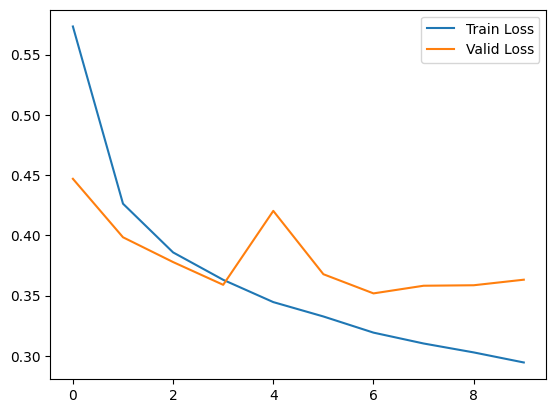

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.legend()

In [ ]:
# print overall train & valid loss
overall_train_loss=np.mean(train_losses)
overall_valid_loss=np.mean(valid_losses)

In [ ]:
print(overall_train_loss)
print(overall_valid_loss)

0.3652351921146114
0.38015807053645456


In [ ]:
# Set the model to evaluation mode
model.eval()
# Initialize lists to store predictions and labels
predictions = []
true_labels = []

In [ ]:
# Iterate through the test data
with torch.no_grad():  # Disable gradient calculation for efficiency
    for images, labels in testloader:
        # Forward pass: get model predictions
        output = model(images)
        # Get the predicted class label (max log-probability)
        _, predicted = torch.max(output, 1)
        # Store predictions and true labels
        predictions.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

In [ ]:
# Convert lists to numpy arrays for further evaluation if needed
predictions = np.array(predictions)
true_labels = np.array(true_labels)
# Print a few predictions and corresponding true labels
print("Predictions: ", predictions[:10])
print("True Labels: ", true_labels[:10])
# You can also compute accuracy or other metrics
accuracy = np.mean(predictions == true_labels)
print(f'Accuracy on test data: {accuracy * 100:.2f}%')

Predictions:  [7 7 4 7 2 2 5 4 3 2]
True Labels:  [7 7 6 7 6 2 5 6 3 4]
Accuracy on test data: 87.25%


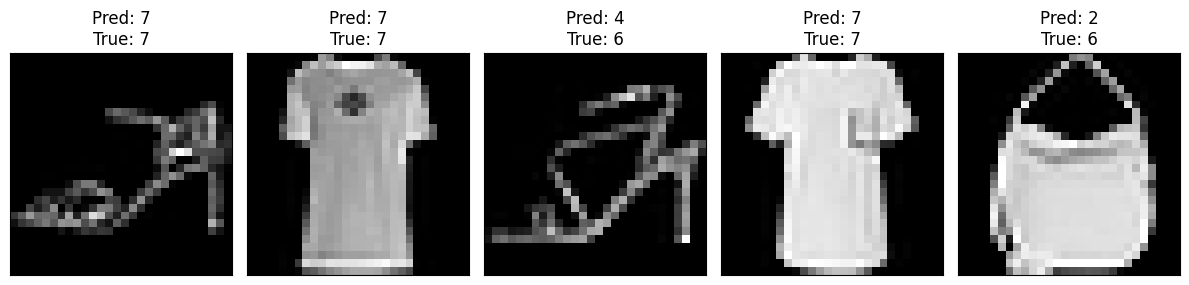

In [ ]:
# Visualize the first 5 predictions
fig = plt.figure(figsize=(12, 6))
for idx in range(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(f'Pred: {predictions[idx]}\nTrue: {true_labels[idx]}')
plt.tight_layout()
plt.show()